In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

def relation(cause_morte):
    morti=pd.read_csv('../csv/Morti_province_definitivo.csv', encoding='utf-8')

    morti.drop(morti.index[(morti["TIPO_DATO15"]=="DEATH")], axis=0, inplace=True)
    morti.drop(morti.index[(morti["Causa iniziale di morte - European Short List"]!=cause_morte)], axis=0, inplace=True)
    morti.drop(morti.index[(morti["Sesso"]!="totale")], axis=0, inplace=True)
    return morti
#morti

In [2]:
def provinces(pollutant):
    pollution = pd.read_csv('../csv/pollution_province/'+pollutant+'_2019.csv')
    pollution = pollution[['Provincia', 'Valore medio annuo³ [µg/m³]']]
    pollution.drop(pollution.index[(pollution['Valore medio annuo³ [µg/m³]']=="-")], axis=0, inplace=True)
    pollution.drop(pollution.index[(pollution['Valore medio annuo³ [µg/m³]']=="n.d.")], axis=0, inplace=True)
    pollution['Valore medio annuo³ [µg/m³]'] = pollution['Valore medio annuo³ [µg/m³]'].apply(int)
    pollution = pollution.groupby(by='Provincia').mean()
    return pollution
provinces("NO2")

,Valore medio annuo³ [µg/m³]
Provincia,
Agrigento,12.500
Alessandria,22.500
Ancona,21.000
Aosta,14.750
Arezzo,16.000
...,...
Vercelli,21.500
Verona,21.800
Vibo Valentia,14.500


In [3]:
def pollution_choose(pollutant, cause_morti):
    
    ds_inq=provinces(pollutant)
    ds_death=relation(cause_morti)
    
    ds_tot=pd.merge(ds_inq, ds_death, right_on="Territorio", left_on="Provincia")
    ds_tot=ds_tot[['Territorio','Valore medio annuo³ [µg/m³]','Value']]
    
    ds_tot.plot.scatter(x='Valore medio annuo³ [µg/m³]', y='Value')
    x=np.array(ds_tot['Valore medio annuo³ [µg/m³]'])
    y=np.array(ds_tot['Value'])
    plt.show()
    #Pearson
    print(scipy.stats.pearsonr(x, y))
    #Spearman
    print(scipy.stats.spearmanr(x, y))
    #Kendall
    print(scipy.stats.kendalltau(x, y))
#pollution_choose("NO2", "influenza")

In [4]:
morti=pd.read_csv('../csv/Morti_province_definitivo.csv', encoding='utf-8')
s=morti['Causa iniziale di morte - European Short List'].unique()
for x in s:
    print(x)

di cui tumori maligni della trachea, dei bronchi e dei polmoni
di cui tumori maligni della prostata
du cui altre malattie ischemiche del cuore
altre malattie del sistema circolatorio
polmonite
altre malattie del sistema nervoso e degli organi di senso
di cui tumori maligni del cervello e del sistema nervoso centrale
di cui leucemia
tumori non maligni (benigni e di comportamento incerto)
di cui altre malattie croniche delle basse vie respiratorie
di cui morbo di hodgkin e linfomi
di cui altri tumori maligni
di cui altri tumori maligni del tessuto linfatico/ematopoietico
malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario
altre malattie del sistema respiratorio
di cui tumori maligni dello stomaco
di cui tumori maligni del pancreas
di cui melanomi maligni della cute
malattia di alzheimer
diabete mellito
di cui tumori maligni del fegato e dei dotti biliari intraepatici
morbo di parkinson
di cui tumori maligni dell'esofago
tubercolosi
di cui tumori ma

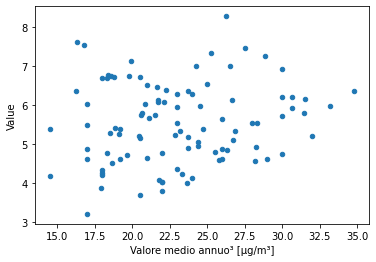

(0.13973481703762097, 0.16775162010803227)
SpearmanrResult(correlation=0.11347412647244123, pvalue=0.26342580020308703)
KendalltauResult(correlation=0.08044004428890107, pvalue=0.2406455884484089)


/home/marco/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


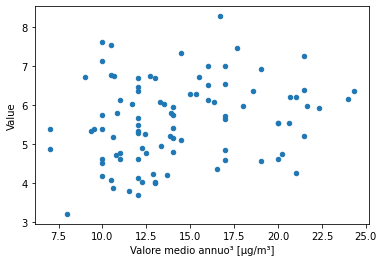

(0.22844290916969556, 0.027634312590544947)
SpearmanrResult(correlation=0.22341781836529712, pvalue=0.03134119533350426)
KendalltauResult(correlation=0.15228862387269684, pvalue=0.03287186194681796)


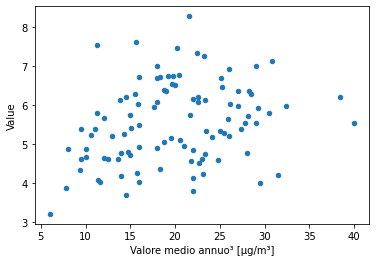

(0.274529209408284, 0.005465538718998265)
SpearmanrResult(correlation=0.27549971410091495, pvalue=0.005296055478594719)
KendalltauResult(correlation=0.1932408659874288, pvalue=0.004335719356300209)


In [5]:
#di cui tumori maligni della trachea, dei bronchi e dei polmoni #
desease="di cui tumori maligni della trachea, dei bronchi e dei polmoni"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

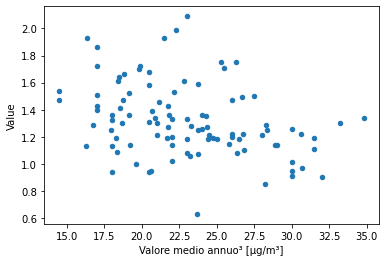

(-0.34054365478284787, 0.0005626085428552497)
SpearmanrResult(correlation=-0.3525082598164312, pvalue=0.000345632105971122)
KendalltauResult(correlation=-0.24367395893768518, pvalue=0.00040135633481453884)


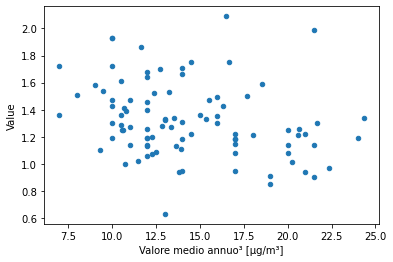

(-0.26476224459958664, 0.010326963502594395)
SpearmanrResult(correlation=-0.3103024571483427, pvalue=0.002469357444155371)
KendalltauResult(correlation=-0.2105087717360375, pvalue=0.003297219138269319)


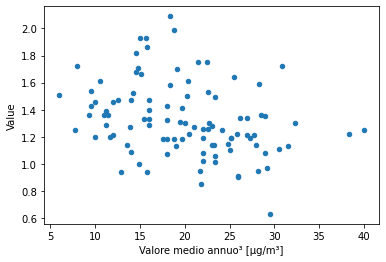

(-0.3084013605875209, 0.001702966407056733)
SpearmanrResult(correlation=-0.3472266340585942, pvalue=0.00037439252597424666)
KendalltauResult(correlation=-0.22843527444001768, pvalue=0.0007843530492278644)


In [6]:
#di cui tumori maligni della prostata
desease="di cui tumori maligni della prostata"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

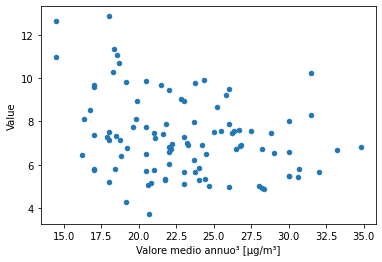

(-0.289080715682351, 0.0037076905417653397)
SpearmanrResult(correlation=-0.2491533069413428, pvalue=0.012885746939897273)
KendalltauResult(correlation=-0.17250781017094916, pvalue=0.011865686505234964)


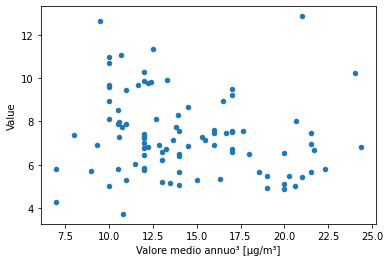

(-0.16242192343691794, 0.11982603781063457)
SpearmanrResult(correlation=-0.21714301025590027, pvalue=0.03655088474803746)
KendalltauResult(correlation=-0.15345669580960378, pvalue=0.03153540674698806)


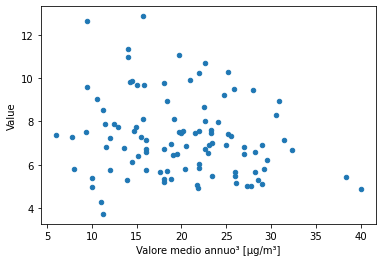

(-0.18681523371835668, 0.06139992987313088)
SpearmanrResult(correlation=-0.17615706622088168, pvalue=0.07804767471985462)
KendalltauResult(correlation=-0.1244534795351136, pvalue=0.0661808909766087)


In [7]:
#du cui altre malattie ischemiche del cuore
desease="du cui altre malattie ischemiche del cuore"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

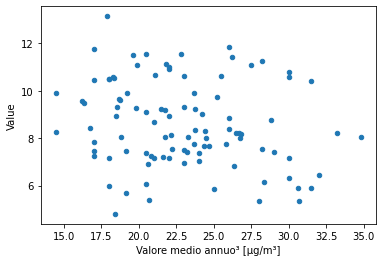

(-0.2004337958668042, 0.046679362354386085)
SpearmanrResult(correlation=-0.19486010839262483, pvalue=0.053263273468030545)
KendalltauResult(correlation=-0.13561510171630994, pvalue=0.04794906574180804)


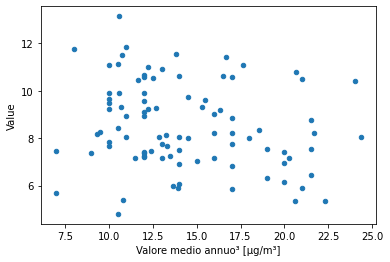

(-0.20163858355056025, 0.05259999035116608)
SpearmanrResult(correlation=-0.21800065245609898, pvalue=0.0357986272426506)
KendalltauResult(correlation=-0.15422244025530943, pvalue=0.030752890308956414)


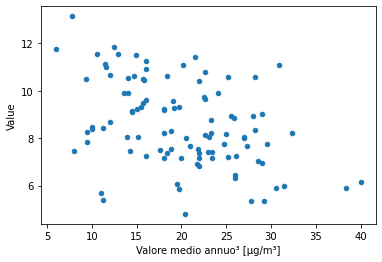

(-0.42144091353881574, 1.1389956374288702e-05)
SpearmanrResult(correlation=-0.4069684821277607, pvalue=2.406545856363875e-05)
KendalltauResult(correlation=-0.28253345846160305, pvalue=3.0407181973156977e-05)


In [8]:
#altre malattie del sistema circolatorio
desease="altre malattie del sistema circolatorio"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

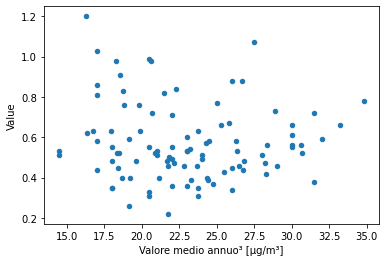

(-0.07097179735267803, 0.4851314981924972)
SpearmanrResult(correlation=-0.044081201384565845, pvalue=0.6648384114574566)
KendalltauResult(correlation=-0.025895547265664877, pvalue=0.7075349398190367)


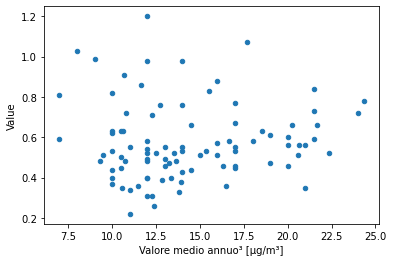

(0.05414171599178396, 0.6062452146015372)
SpearmanrResult(correlation=0.11557833535989254, pvalue=0.2699296978501826)
KendalltauResult(correlation=0.09386336984844457, pvalue=0.19132122528293494)


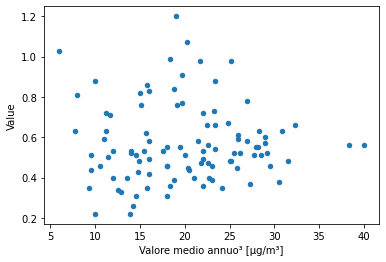

(0.0027298665667585056, 0.9783852571124386)
SpearmanrResult(correlation=0.09237224314545334, pvalue=0.3582312568199473)
KendalltauResult(correlation=0.06308931567708445, pvalue=0.35501699903783446)


In [9]:
#di cui tumori maligni delle labbra, cavità orale e faringe 
desease="di cui tumori maligni delle labbra, cavità orale e faringe"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

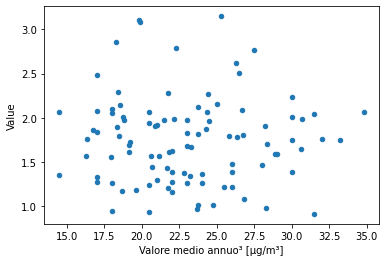

(-0.018605034766165988, 0.8549686589733075)
SpearmanrResult(correlation=-0.012344533552859069, pvalue=0.9034761994460025)
KendalltauResult(correlation=-0.010172332937815736, pvalue=0.8821900246509805)


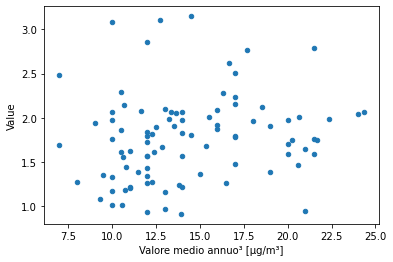

(0.17213878687900122, 0.09895608851502616)
SpearmanrResult(correlation=0.23749177631414686, pvalue=0.021893414889727254)
KendalltauResult(correlation=0.16647914202042893, pvalue=0.019813482518358412)


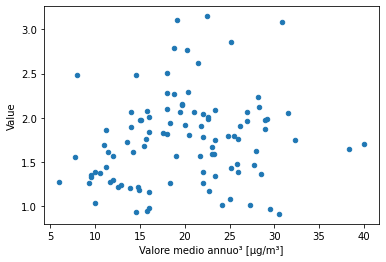

(0.15962590512661584, 0.11082535295798876)
SpearmanrResult(correlation=0.17625796619689024, pvalue=0.07787461811240384)
KendalltauResult(correlation=0.10968449651281449, pvalue=0.10583847989275563)


In [10]:
#altre malattie del sistema nervoso e degli organi di senso #?
desease="altre malattie del sistema nervoso e degli organi di senso"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

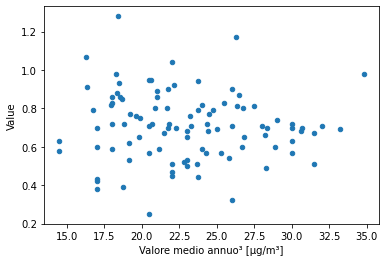

(-0.05760891398510503, 0.5711270725201708)
SpearmanrResult(correlation=-0.10003311059107976, pvalue=0.3245504646442201)
KendalltauResult(correlation=-0.06851226087101431, pvalue=0.3209861770979605)


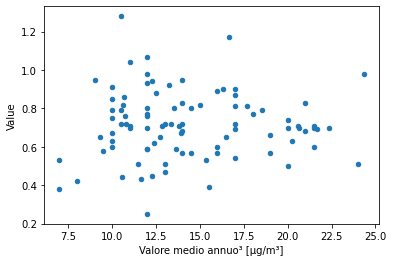

(0.021645609345908742, 0.8368349502619009)
SpearmanrResult(correlation=0.00032505629502790147, pvalue=0.997532679510682)
KendalltauResult(correlation=-0.0033473130793529914, pvalue=0.9628679346159498)


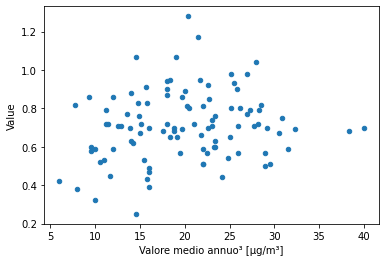

(0.1652418549642688, 0.09866459346986912)
SpearmanrResult(correlation=0.12856344335298123, pvalue=0.20009228902636497)
KendalltauResult(correlation=0.08572998977186874, pvalue=0.20884886452318263)


In [11]:
#di cui tumori maligni del cervello e del sistema nervoso centrale
desease="di cui tumori maligni del cervello e del sistema nervoso centrale"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

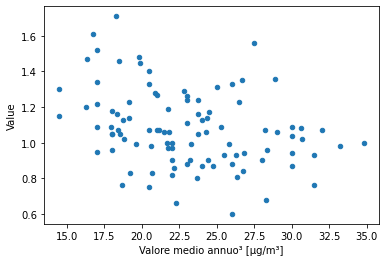

(-0.32025514274728434, 0.0012310456713264593)
SpearmanrResult(correlation=-0.3342903655367916, pvalue=0.0007202729193649987)
KendalltauResult(correlation=-0.22810725148072075, pvalue=0.0009341235589369496)


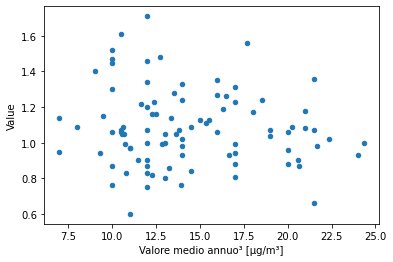

(-0.1129311274408569, 0.28112692628809155)
SpearmanrResult(correlation=-0.07493063888323023, pvalue=0.4753284089844606)
KendalltauResult(correlation=-0.053894263081803194, pvalue=0.45244217933712494)


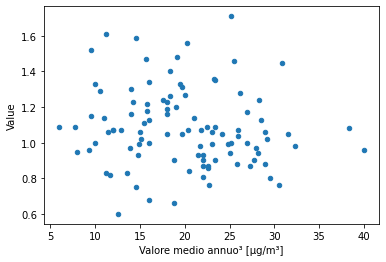

(-0.12089512623844025, 0.2284811537982185)
SpearmanrResult(correlation=-0.1633804163932778, pvalue=0.10257329694616969)
KendalltauResult(correlation=-0.10197018419836225, pvalue=0.13431427429410706)


In [12]:
#di cui leucemia
desease="di cui leucemia"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

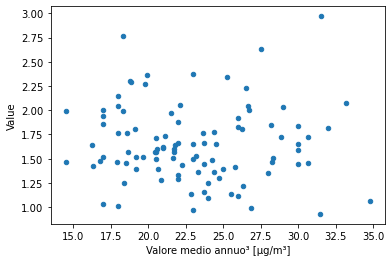

(-0.031085604659266942, 0.7600283674121224)
SpearmanrResult(correlation=-0.06262624413117633, pvalue=0.538017027388623)
KendalltauResult(correlation=-0.04177927843514235, pvalue=0.5432271677597332)


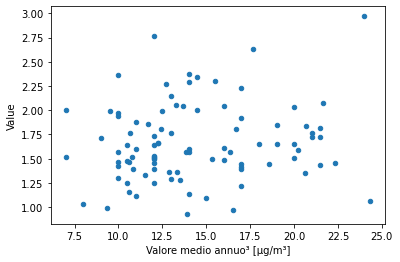

(0.132064233097076, 0.20698773022934885)
SpearmanrResult(correlation=0.12931810340180735, pvalue=0.21667162626127895)
KendalltauResult(correlation=0.09108637500047853, pvalue=0.20299721527081116)


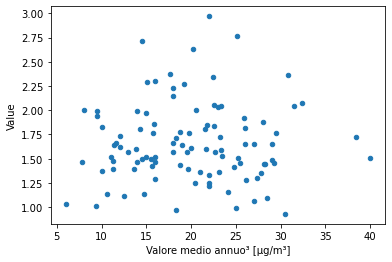

(0.02391788795427789, 0.8123358022594112)
SpearmanrResult(correlation=0.0018175727830820787, pvalue=0.9856077202904652)
KendalltauResult(correlation=0.002789956656427696, pvalue=0.9672220510120177)


In [13]:
#tumori non maligni (benigni e di comportamento incerto) 
desease="tumori non maligni (benigni e di comportamento incerto)"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

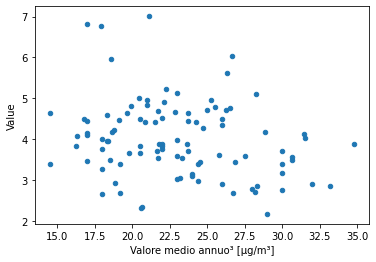

(-0.23541442889349662, 0.018993196307683303)
SpearmanrResult(correlation=-0.20790379947361967, pvalue=0.038926217182671176)
KendalltauResult(correlation=-0.13315427096825191, pvalue=0.05219269500383819)


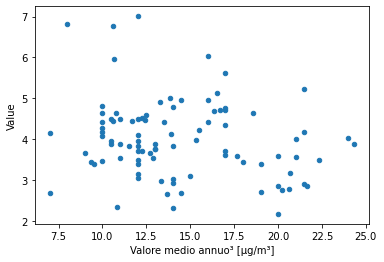

(-0.2032081861807759, 0.05074860903679308)
SpearmanrResult(correlation=-0.16323286004357557, pvalue=0.11796415308049438)
KendalltauResult(correlation=-0.10819297347141707, pvalue=0.12964664049038774)


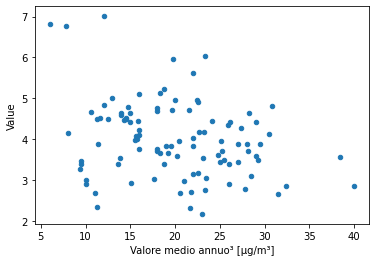

(-0.2792753059920797, 0.004680314850598441)
SpearmanrResult(correlation=-0.2333425570423913, pvalue=0.018854724659697803)
KendalltauResult(correlation=-0.15968994594121558, pvalue=0.018438983518247607)


In [14]:
#di cui altre malattie croniche delle basse vie respiratorie
desease="di cui altre malattie croniche delle basse vie respiratorie"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

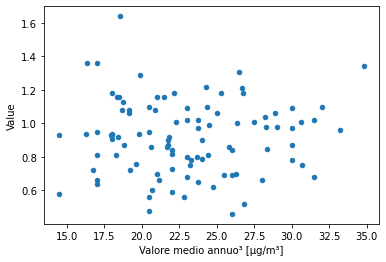

(0.012421947980530021, 0.9028738272156719)
SpearmanrResult(correlation=0.01605892707810795, pvalue=0.8746418467143598)
KendalltauResult(correlation=0.004376829760535283, pvalue=0.9493480084086674)


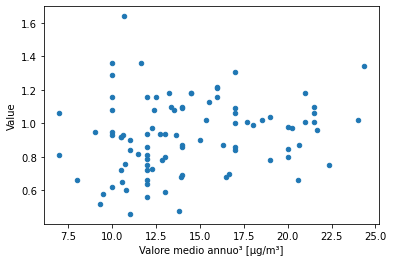

(0.19196326073712794, 0.06527456680427109)
SpearmanrResult(correlation=0.2365695109691614, pvalue=0.022427518793235405)
KendalltauResult(correlation=0.15762879600474297, pvalue=0.027987673273455613)


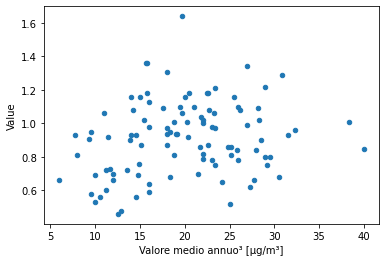

(0.2097165343691791, 0.03530367808174845)
SpearmanrResult(correlation=0.21110894425916357, pvalue=0.034077310429156675)
KendalltauResult(correlation=0.13690500445602613, pvalue=0.04433301106965413)


In [15]:
#di cui morbo di hodgkin e linfomi 
desease="di cui morbo di hodgkin e linfomi"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

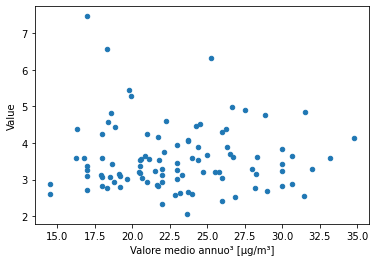

(-0.026634359744015602, 0.7935610010059422)
SpearmanrResult(correlation=0.058683798701965585, pvalue=0.5639540465836086)
KendalltauResult(correlation=0.03817048696612148, pvalue=0.5778946929589037)


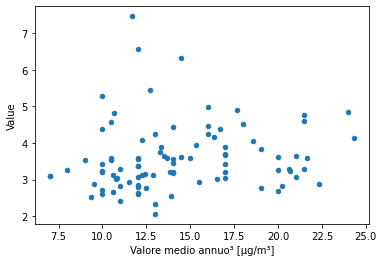

(0.1340239941558736, 0.20026842623471713)
SpearmanrResult(correlation=0.2606315190029861, pvalue=0.011628676572453386)
KendalltauResult(correlation=0.17605084718375322, pvalue=0.013662222272447386)


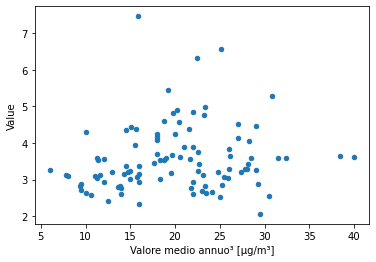

(0.1462910133548812, 0.14435265459191077)
SpearmanrResult(correlation=0.2070047187799422, pvalue=0.037798717933446926)
KendalltauResult(correlation=0.14521593792912796, pvalue=0.03215496901948575)


In [16]:
#di cui altri tumori maligni
desease="di cui altri tumori maligni"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

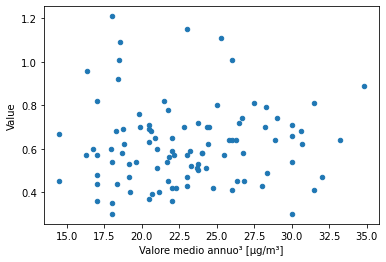

(0.04054449288078994, 0.6902962298037902)
SpearmanrResult(correlation=0.09223786255323975, pvalue=0.36385859172287305)
KendalltauResult(correlation=0.06788562433865747, pvalue=0.32545281655455627)


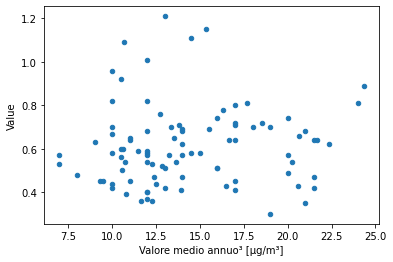

(0.05965839995982686, 0.5700010187510892)
SpearmanrResult(correlation=0.12136170315172937, pvalue=0.2465254153530526)
KendalltauResult(correlation=0.08124355569925594, pvalue=0.2582627862245531)


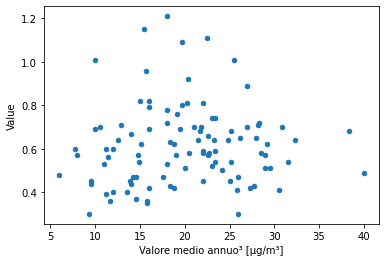

(0.0579185648707802, 0.5650800316529913)
SpearmanrResult(correlation=0.1124584860247353, pvalue=0.262849265516553)
KendalltauResult(correlation=0.06490494136604605, pvalue=0.34143676296585845)


In [17]:
#di cui altri tumori maligni del tessuto linfatico/ematopoietico
desease="di cui altri tumori maligni del tessuto linfatico/ematopoietico"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

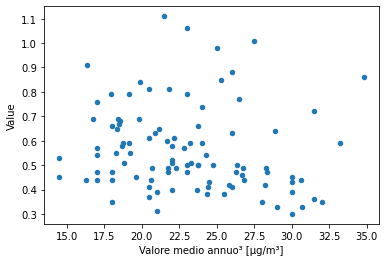

(-0.15006371037616545, 0.13819103667976781)
SpearmanrResult(correlation=-0.2380538417568996, pvalue=0.017656600020265232)
KendalltauResult(correlation=-0.16834172701525033, pvalue=0.014853834505096912)


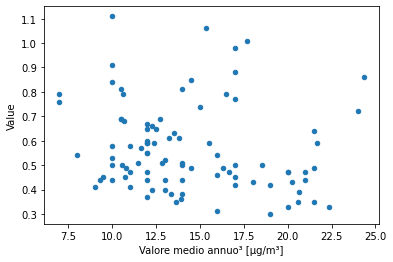

(-0.16128683945077277, 0.12247006544495101)
SpearmanrResult(correlation=-0.22077789813377452, pvalue=0.0334511699947622)
KendalltauResult(correlation=-0.1567183884037149, pvalue=0.02938748383098335)


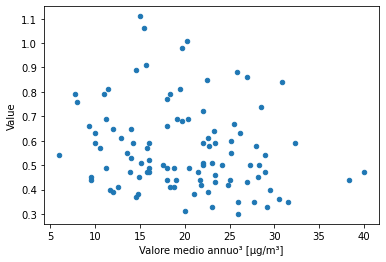

(-0.20082322724181695, 0.04404198993431988)
SpearmanrResult(correlation=-0.21525462639545864, pvalue=0.030636330134221203)
KendalltauResult(correlation=-0.14499494734854407, pvalue=0.0337384898099599)


In [18]:
#malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario
desease="malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

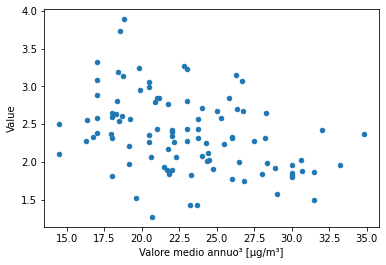

(-0.3767152871630743, 0.00012141142290649619)
SpearmanrResult(correlation=-0.3942085876800932, pvalue=5.40769371009255e-05)
KendalltauResult(correlation=-0.26605879708734714, pvalue=0.00010568688452597725)


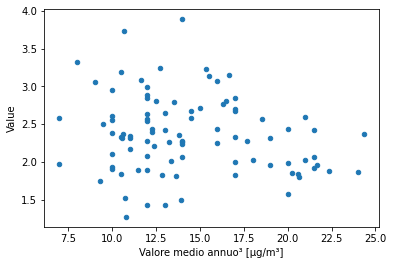

(-0.18014958725111255, 0.08399345551952796)
SpearmanrResult(correlation=-0.14170537108808237, pvalue=0.1754420955565427)
KendalltauResult(correlation=-0.10492046006098689, pvalue=0.14183279605135843)


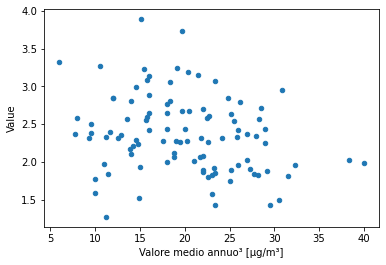

(-0.24315589454110303, 0.014279217666883996)
SpearmanrResult(correlation=-0.24308990016136822, pvalue=0.014306434053180321)
KendalltauResult(correlation=-0.16834152604953392, pvalue=0.01302985306917269)


In [19]:
#altre malattie del sistema respiratorio
desease="altre malattie del sistema respiratorio"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

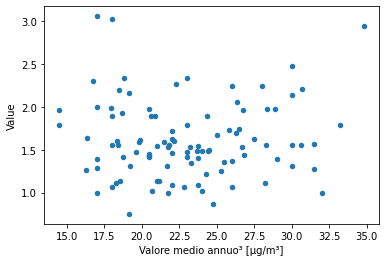

(0.042899953860228206, 0.6733007486035201)
SpearmanrResult(correlation=0.009447065212106321, pvalue=0.926058171778337)
KendalltauResult(correlation=0.011855242290238226, pvalue=0.8631178226844524)


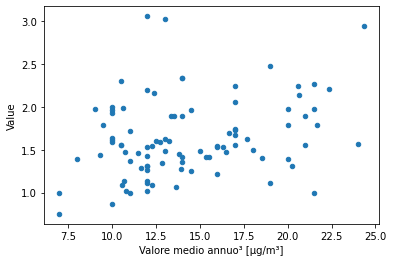

(0.2869619546863553, 0.005289666724637507)
SpearmanrResult(correlation=0.25134562980961267, pvalue=0.015088103314065286)
KendalltauResult(correlation=0.18359969060148673, pvalue=0.010286077739958573)


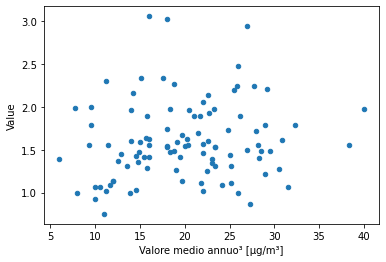

(0.13983185738568754, 0.1631174784040979)
SpearmanrResult(correlation=0.15006976270931371, pvalue=0.13415760333958743)
KendalltauResult(correlation=0.10767704615714271, pvalue=0.11295469453468211)


In [20]:
#di cui tumori maligni dello stomaco
desease="di cui tumori maligni dello stomaco"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

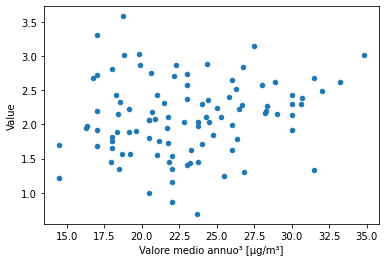

(0.16177336126993525, 0.1096566163737852)
SpearmanrResult(correlation=0.17935917492599318, pvalue=0.07567173123292684)
KendalltauResult(correlation=0.12497437609316475, pvalue=0.06865801272407768)


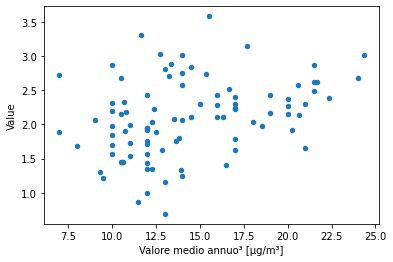

(0.34209394280953564, 0.0007899765610399965)
SpearmanrResult(correlation=0.37787732893098186, pvalue=0.0001882492845042322)
KendalltauResult(correlation=0.25580469888765783, pvalue=0.0003441510789738981)


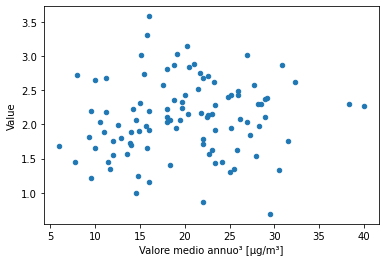

(0.10177018992055145, 0.3112134574228034)
SpearmanrResult(correlation=0.1429782252770246, pvalue=0.15376232403667792)
KendalltauResult(correlation=0.09973127541364803, pvalue=0.14144412241329937)


In [21]:
#di cui tumori maligni del pancreas
desease="di cui tumori maligni del pancreas"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

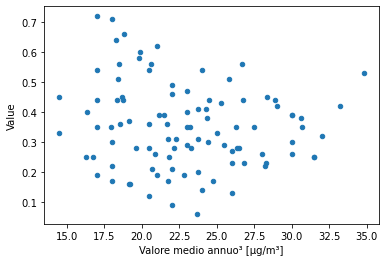

(-0.1336361845352787, 0.18726954579882846)
SpearmanrResult(correlation=-0.12395976551520674, pvalue=0.2215409158112137)
KendalltauResult(correlation=-0.08419025591817045, pvalue=0.2237521395344214)


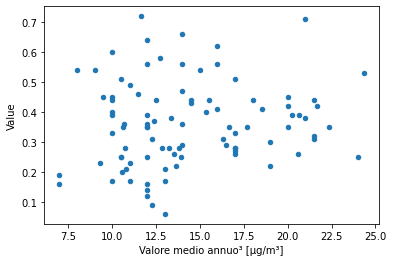

(0.1229356935238238, 0.2404054794225882)
SpearmanrResult(correlation=0.11658221832015007, pvalue=0.26576322517960804)
KendalltauResult(correlation=0.08006725154696968, pvalue=0.2665911825492342)


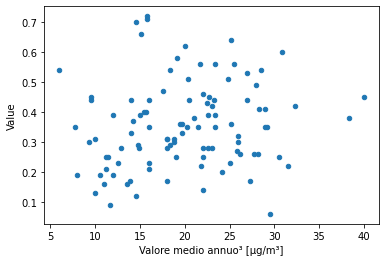

(0.1451438585809998, 0.14756054956687836)
SpearmanrResult(correlation=0.18957183969875194, pvalue=0.05760201651283579)
KendalltauResult(correlation=0.1293085620381739, pvalue=0.058574450018155096)


In [22]:
#di cui melanomi maligni della cute
desease="di cui melanomi maligni della cute"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

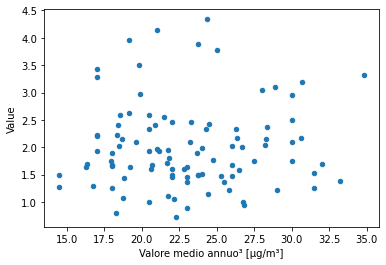

(0.0464652372198027, 0.6478877910719063)
SpearmanrResult(correlation=0.012035075388290626, pvalue=0.905884678641282)
KendalltauResult(correlation=0.01058533793837975, pvalue=0.8774205634323431)


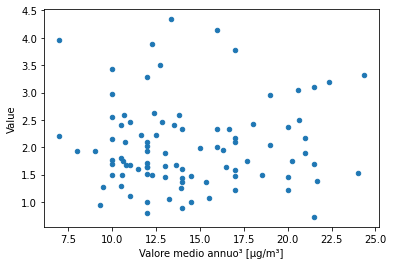

(0.03292607847904168, 0.7540390015604148)
SpearmanrResult(correlation=0.004526376553062887, pvalue=0.9656531925303216)
KendalltauResult(correlation=0.00023743232214228272, pvalue=0.9973481738615397)


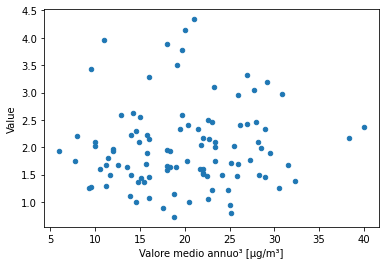

(0.06316604862520146, 0.5303076898945109)
SpearmanrResult(correlation=0.09113574546644597, pvalue=0.3647291958499218)
KendalltauResult(correlation=0.05453822628382333, pvalue=0.4212907436406227)


In [23]:
#malattia di alzheimer
desease="malattia di alzheimer"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

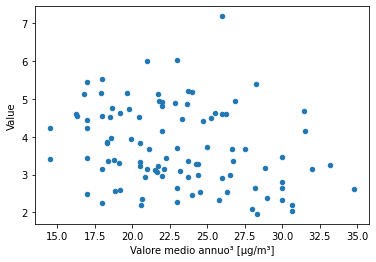

(-0.2623393057719019, 0.008710653139129406)
SpearmanrResult(correlation=-0.2813399905567839, pvalue=0.004787982582184587)
KendalltauResult(correlation=-0.1961244378796402, pvalue=0.004225094473322233)


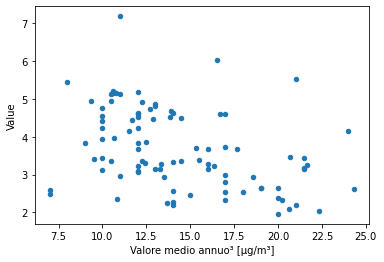

(-0.39598683905720794, 8.5305285144256e-05)
SpearmanrResult(correlation=-0.4294967781262288, pvalue=1.738516749779435e-05)
KendalltauResult(correlation=-0.3054903001588403, pvalue=1.8643640578176387e-05)


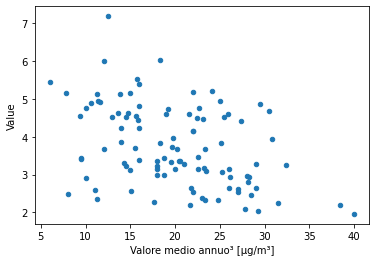

(-0.41506690777134403, 1.590194611126877e-05)
SpearmanrResult(correlation=-0.3994274063969284, pvalue=3.506080780508139e-05)
KendalltauResult(correlation=-0.2876458762084724, pvalue=2.169883106746887e-05)


In [24]:
#diabete mellito
desease="diabete mellito"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

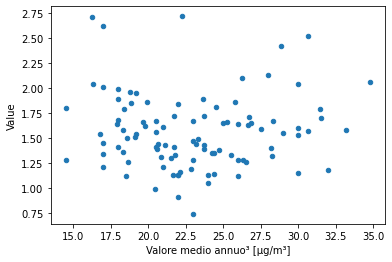

(0.011290376992098089, 0.9116840374687746)
SpearmanrResult(correlation=-0.016756320411322613, pvalue=0.8692451336372754)
KendalltauResult(correlation=-0.023074534573665425, pvalue=0.7370739613679559)


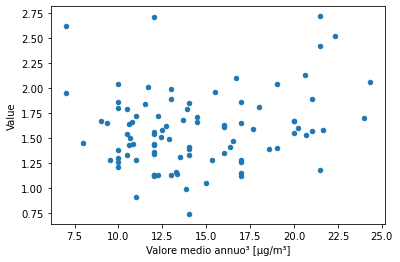

(0.19835696787901708, 0.05665032196369232)
SpearmanrResult(correlation=0.13447230230125556, pvalue=0.19875360424912972)
KendalltauResult(correlation=0.09440478681437565, pvalue=0.18697153154655333)


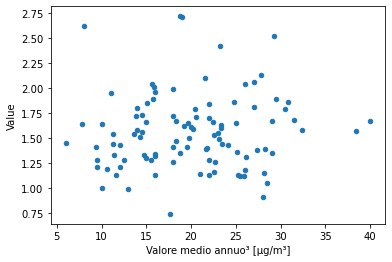

(0.07666637886996433, 0.4460483079219271)
SpearmanrResult(correlation=0.09772423416403729, pvalue=0.3309405010201697)
KendalltauResult(correlation=0.06278028433236192, pvalue=0.3551788197087222)


In [25]:
#di cui tumori maligni del fegato e dei dotti biliari intraepatici
desease="di cui tumori maligni del fegato e dei dotti biliari intraepatici"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

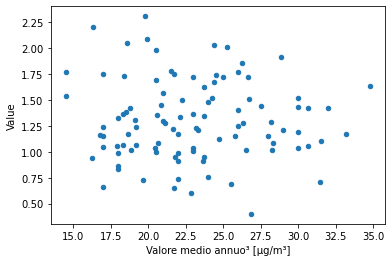

(-0.028678263900980275, 0.7781128708329812)
SpearmanrResult(correlation=0.030421603083846786, pvalue=0.7650040795694365)
KendalltauResult(correlation=0.0184916048471534, pvalue=0.7877911013121227)


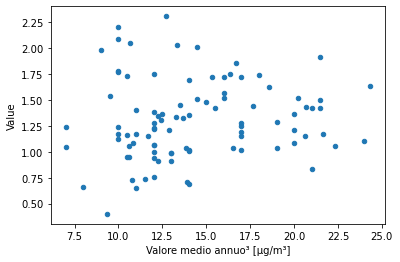

(0.10227908178442678, 0.329280035865741)
SpearmanrResult(correlation=0.13988429253498116, pvalue=0.18111293597688977)
KendalltauResult(correlation=0.10174051779103922, pvalue=0.154855482726016)


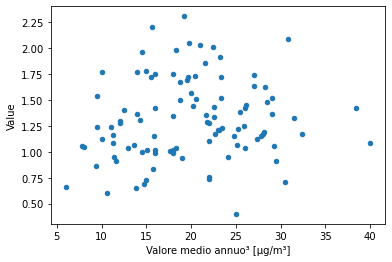

(0.11587183083820131, 0.24854355360856764)
SpearmanrResult(correlation=0.15455215382113463, pvalue=0.12278605176891062)
KendalltauResult(correlation=0.09024803670224597, pvalue=0.183646299724179)


In [26]:
#morbo di parkinson
desease="morbo di parkinson"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

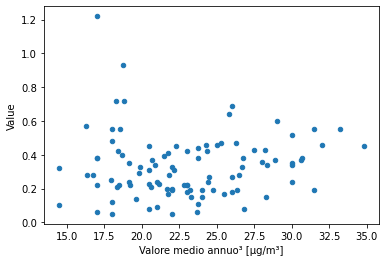

(0.05455792564593651, 0.5917166859961915)
SpearmanrResult(correlation=0.11147556624687711, pvalue=0.27198220957589553)
KendalltauResult(correlation=0.07632885759076567, pvalue=0.26939218871504944)


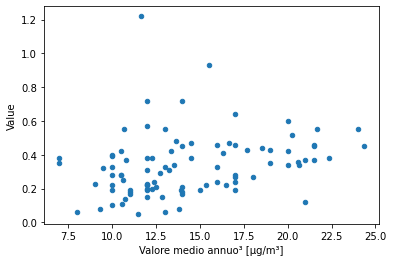

(0.27112358145633464, 0.008571446368187796)
SpearmanrResult(correlation=0.36574437609518706, pvalue=0.0003119598773518412)
KendalltauResult(correlation=0.2550257917298661, pvalue=0.00039282560689008313)


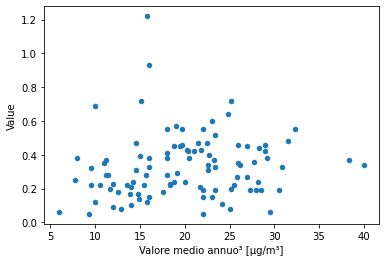

(0.12788715811132512, 0.20248889142982518)
SpearmanrResult(correlation=0.20703803607021973, pvalue=0.037767190540010834)
KendalltauResult(correlation=0.14055454906181375, pvalue=0.039545499713625164)


In [27]:
#di cui tumori maligni dell'esofago  
desease="di cui tumori maligni dell'esofago"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

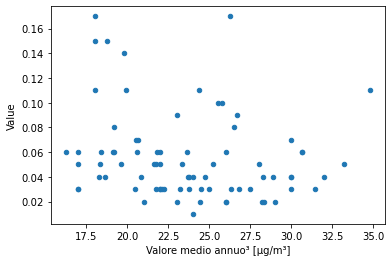

(-0.19090879778675401, 0.09407628607386265)
SpearmanrResult(correlation=-0.23385495875779305, pvalue=0.0393342089502171)
KendalltauResult(correlation=-0.16887908460850956, pvalue=0.038507390134671304)


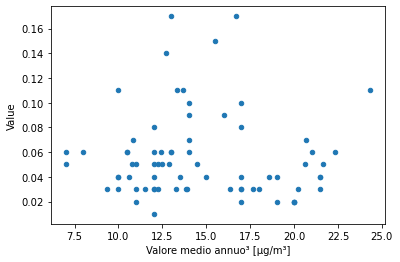

(-0.04065841984415412, 0.7327037501207884)
SpearmanrResult(correlation=-0.07342468666318047, pvalue=0.537005748467996)
KendalltauResult(correlation=-0.04438669189472864, pvalue=0.602080421115011)


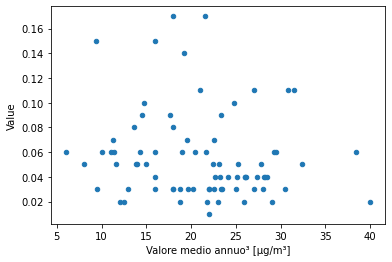

(-0.14065934323479062, 0.2162957813030187)
SpearmanrResult(correlation=-0.16753285119243388, pvalue=0.14000232744755675)
KendalltauResult(correlation=-0.10110594823985233, pvalue=0.2112312322072255)


In [28]:
#tubercolosi
desease="tubercolosi"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

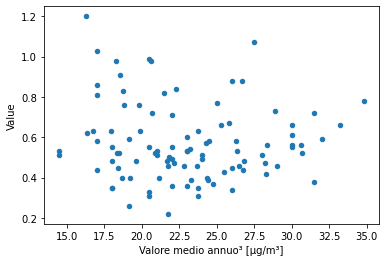

(-0.07097179735267803, 0.4851314981924972)
SpearmanrResult(correlation=-0.044081201384565845, pvalue=0.6648384114574566)
KendalltauResult(correlation=-0.025895547265664877, pvalue=0.7075349398190367)


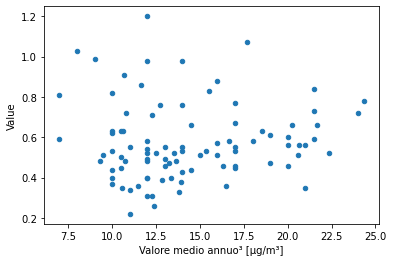

(0.05414171599178396, 0.6062452146015372)
SpearmanrResult(correlation=0.11557833535989254, pvalue=0.2699296978501826)
KendalltauResult(correlation=0.09386336984844457, pvalue=0.19132122528293494)


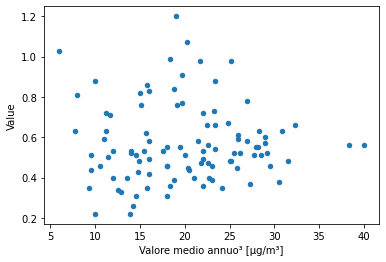

(0.0027298665667585056, 0.9783852571124386)
SpearmanrResult(correlation=0.09237224314545334, pvalue=0.3582312568199473)
KendalltauResult(correlation=0.06308931567708445, pvalue=0.35501699903783446)


In [29]:
#di cui tumori maligni delle labbra, cavità orale e faringe
desease="di cui tumori maligni delle labbra, cavità orale e faringe"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

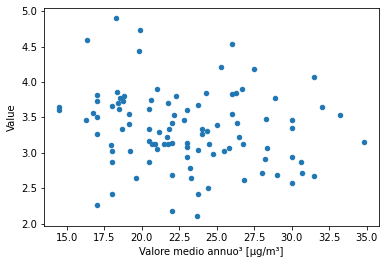

(-0.17320656123370018, 0.08644055458582965)
SpearmanrResult(correlation=-0.1896161352966845, pvalue=0.060137045528995105)
KendalltauResult(correlation=-0.13318110906770037, pvalue=0.05253769066584498)


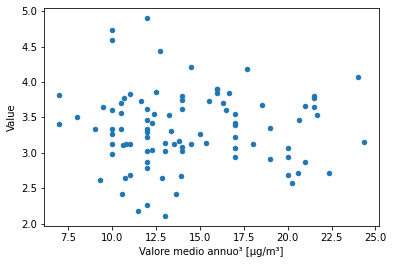

(-0.012841275789625482, 0.9027668078690059)
SpearmanrResult(correlation=0.017777786951100296, pvalue=0.8656885673615708)
KendalltauResult(correlation=0.006418210234481446, pvalue=0.928491657847319)


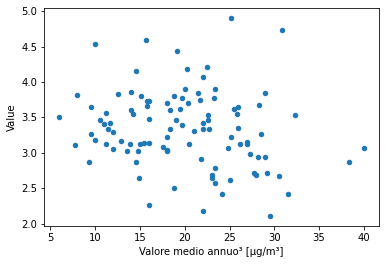

(-0.1827076747065002, 0.06743558920805648)
SpearmanrResult(correlation=-0.19818129920196773, pvalue=0.046960335236050255)
KendalltauResult(correlation=-0.12948207428219544, pvalue=0.05641410577850696)


In [30]:
#di cui tumori maligni del colon, del retto e dell'ano
desease="di cui tumori maligni del colon, del retto e dell'ano"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

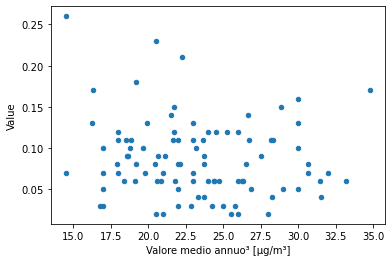

(-0.13115960959530398, 0.20764175584725406)
SpearmanrResult(correlation=-0.12977015789486746, pvalue=0.21253940944232855)
KendalltauResult(correlation=-0.08881175168327908, pvalue=0.22092065548623274)


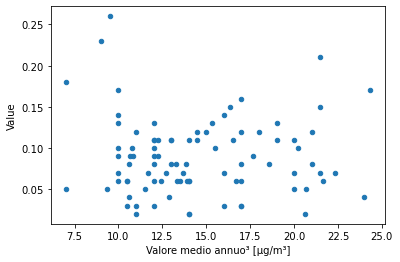

(-0.012553058480939128, 0.9070535927928273)
SpearmanrResult(correlation=0.013238343908456083, pvalue=0.9020040413239099)
KendalltauResult(correlation=0.014723246689606565, pvalue=0.8446498074461827)


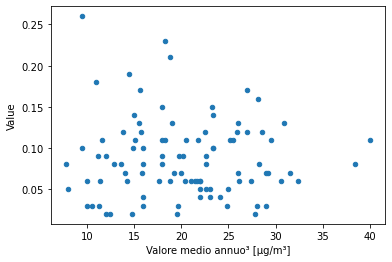

(-0.03660859036883853, 0.7232567869504802)
SpearmanrResult(correlation=0.01233193509276188, pvalue=0.9050776691473821)
KendalltauResult(correlation=0.004783886670331419, pvalue=0.9467663540334289)


In [31]:
#di cui tumori maligni della cervice uterina
desease="di cui tumori maligni della cervice uterina"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

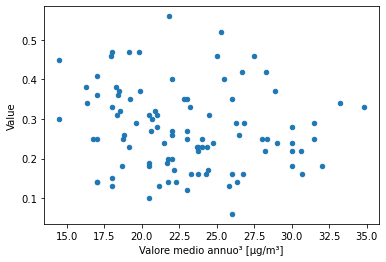

(-0.14277840018603746, 0.1585931021561651)
SpearmanrResult(correlation=-0.1674007994174005, pvalue=0.0976869747045785)
KendalltauResult(correlation=-0.11757774981067357, pvalue=0.09005428837652385)


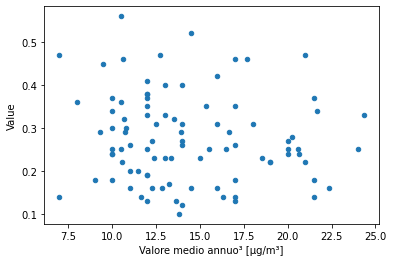

(-0.1007628044132069, 0.33653821829030506)
SpearmanrResult(correlation=-0.10903661081977149, pvalue=0.2981562491465491)
KendalltauResult(correlation=-0.07815324858808546, pvalue=0.27957518295648187)


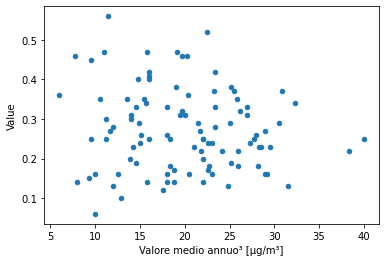

(-0.11340992952208978, 0.2588065561440224)
SpearmanrResult(correlation=-0.08585321956590103, pvalue=0.39329777549180556)
KendalltauResult(correlation=-0.06082345502057147, pvalue=0.3749860579191783)


In [32]:
#di cui tumori maligni della laringe
desease="di cui tumori maligni della laringe"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

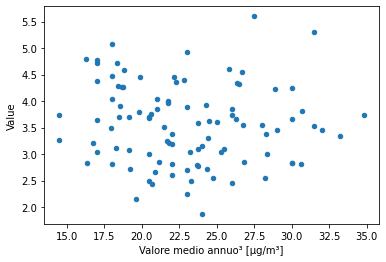

(-0.0777194983360929, 0.4444884699546624)
SpearmanrResult(correlation=-0.13386038836620318, pvalue=0.1865239810497929)
KendalltauResult(correlation=-0.0933807091535877, pvalue=0.17353638698711016)


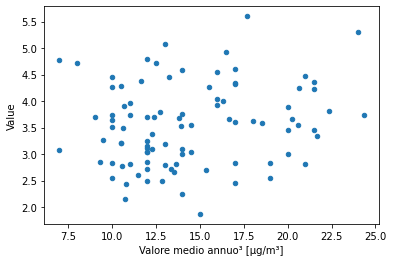

(0.1816212488778122, 0.08145151607008404)
SpearmanrResult(correlation=0.1483017676322921, pvalue=0.15599062677039416)
KendalltauResult(correlation=0.09519918822106595, pvalue=0.18261473357350533)


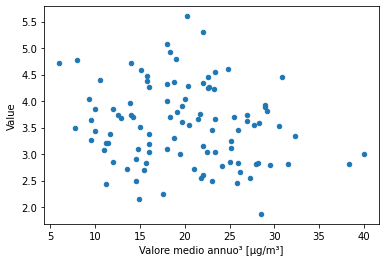

(-0.17186040330536465, 0.0857076421711822)
SpearmanrResult(correlation=-0.1606517176993413, pvalue=0.10852110588700926)
KendalltauResult(correlation=-0.10943101316401838, pvalue=0.10648284163211326)


In [33]:
#di cui infarto miocardico acuto
desease="di cui infarto miocardico acuto"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

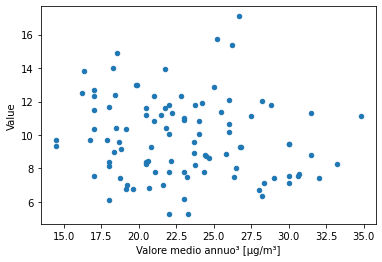

(-0.1322619146114682, 0.1918869012434762)
SpearmanrResult(correlation=-0.16386861655288273, pvalue=0.10507322267424377)
KendalltauResult(correlation=-0.10383500195078565, pvalue=0.12975221711464846)


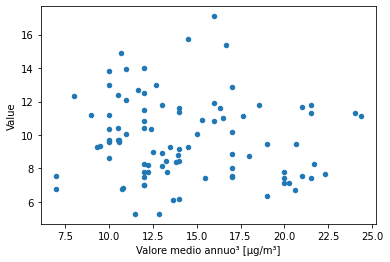

(-0.07939441152051675, 0.44935424083347475)
SpearmanrResult(correlation=-0.1181323927030336, pvalue=0.25941538865570557)
KendalltauResult(correlation=-0.06995227928249893, pvalue=0.3268918047041287)


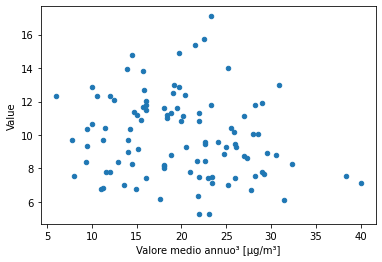

(-0.16958682063084035, 0.08999650732649803)
SpearmanrResult(correlation=-0.17573801898878705, pvalue=0.07876969728756963)
KendalltauResult(correlation=-0.11287785316732353, pvalue=0.0955256027250966)


In [34]:
#malattie cerebrovascolari
desease="malattie cerebrovascolari"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

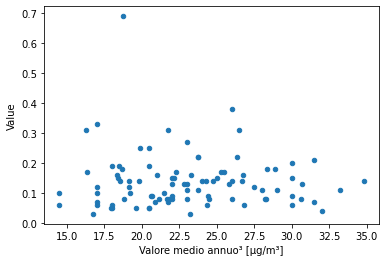

(-0.04793241325012733, 0.6482072383825599)
SpearmanrResult(correlation=0.0633978092365024, pvalue=0.5460262892826468)
KendalltauResult(correlation=0.04424396595133897, pvalue=0.5403531708784644)


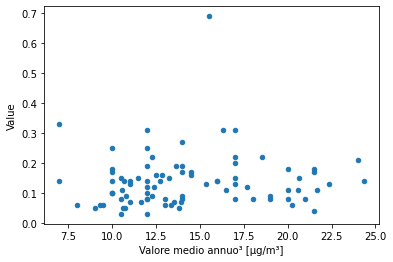

(0.0700431622961872, 0.519146135879762)
SpearmanrResult(correlation=0.16048604563835472, pvalue=0.13756859722966358)
KendalltauResult(correlation=0.11151734973149784, pvalue=0.13907187998966244)


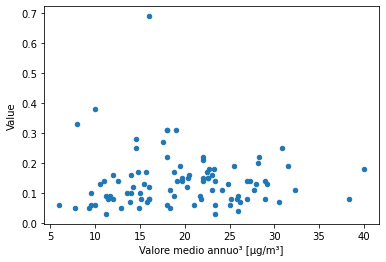

(-0.008897420231111182, 0.9318042981978223)
SpearmanrResult(correlation=0.1241125475329584, pvalue=0.2307906019619273)
KendalltauResult(correlation=0.08233425027312732, pvalue=0.2485655448281865)


In [35]:
#influenza  
desease="influenza"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

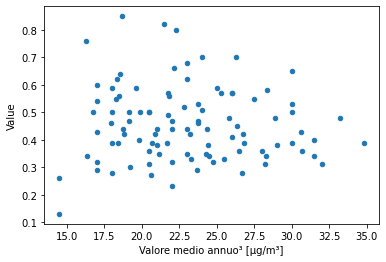

(-0.05302429410089218, 0.602191553696206)
SpearmanrResult(correlation=-0.05219797700589737, pvalue=0.6078692701498931)
KendalltauResult(correlation=-0.038957806724151056, pvalue=0.5734899494159191)


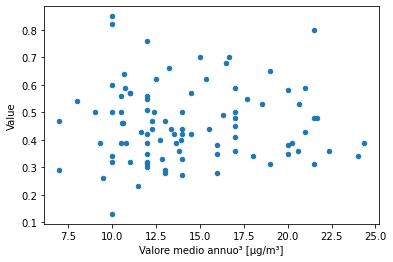

(0.005034328105506136, 0.9618015329018059)
SpearmanrResult(correlation=0.0030976993828359, pvalue=0.9764904064170343)
KendalltauResult(correlation=0.0002394645902079392, pvalue=0.9973464242234494)


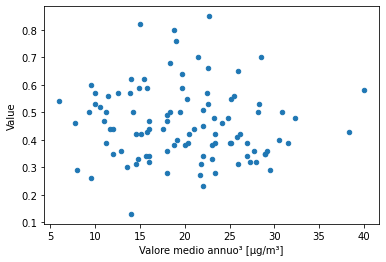

(-0.05957066548701415, 0.5540168352448245)
SpearmanrResult(correlation=-0.10881724484569387, pvalue=0.278716216425245)
KendalltauResult(correlation=-0.06668918308214355, pvalue=0.32951300831864794)


In [36]:
#di cui tumori maligni di altre parti dell'utero
desease="di cui tumori maligni di altre parti dell'utero"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

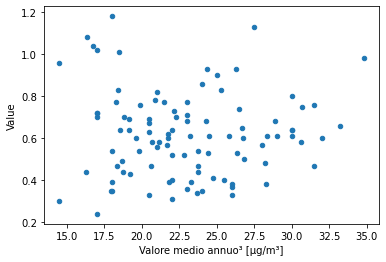

(-0.00587111376117877, 0.9540071681397471)
SpearmanrResult(correlation=-0.014154927753690044, pvalue=0.8894043107315475)
KendalltauResult(correlation=-0.008763728040604303, pvalue=0.8988866456363279)


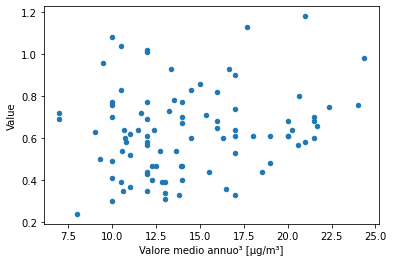

(0.19237072860817292, 0.06469490689842457)
SpearmanrResult(correlation=0.14941106954431624, pvalue=0.15288412678484886)
KendalltauResult(correlation=0.1069867593538852, pvalue=0.13633045969905982)


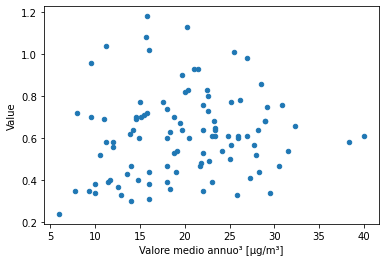

(0.12067561807929776, 0.22933337747539653)
SpearmanrResult(correlation=0.1508766659212558, pvalue=0.1320534234491305)
KendalltauResult(correlation=0.10845542620915713, pvalue=0.11153441496340549)


In [37]:
#di cui tumori maligni del rene
desease="di cui tumori maligni del rene"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

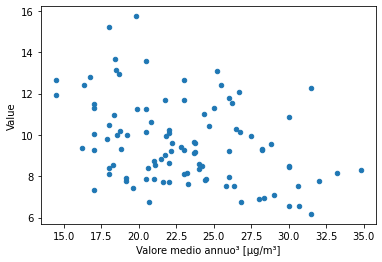

(-0.3607420135711309, 0.0002443888887938353)
SpearmanrResult(correlation=-0.3410038538988113, pvalue=0.0005523595417812983)
KendalltauResult(correlation=-0.23510054181343765, pvalue=0.0006049191311716473)


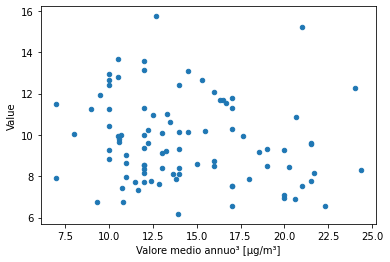

(-0.15699406754190465, 0.13287627544561012)
SpearmanrResult(correlation=-0.1790452829562243, pvalue=0.08594203073087836)
KendalltauResult(correlation=-0.12022306981771849, pvalue=0.09199863075373438)


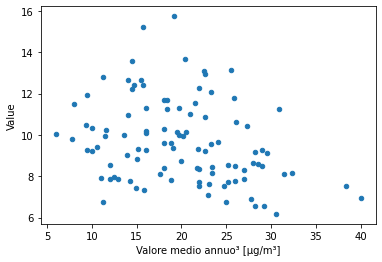

(-0.2947999866022203, 0.00276583825564624)
SpearmanrResult(correlation=-0.306901453924975, pvalue=0.0017985490272484697)
KendalltauResult(correlation=-0.20852835116979096, pvalue=0.002079675940800454)


In [38]:
#altre malattie del cuore
desease="altre malattie del cuore"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

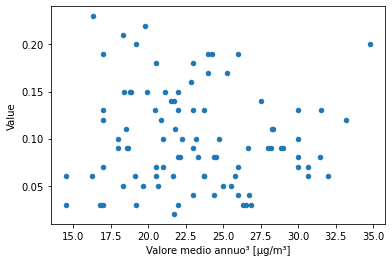

(-0.058078386310783464, 0.5802772766257629)
SpearmanrResult(correlation=-0.06131432012235357, pvalue=0.5593235600050425)
KendalltauResult(correlation=-0.04516498469243232, pvalue=0.5335786124082504)


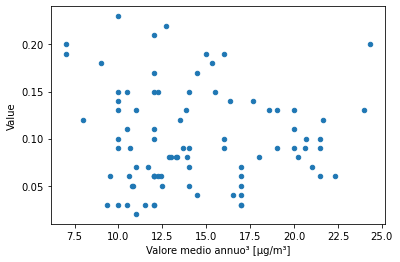

(-0.036216574160672026, 0.7391123365168154)
SpearmanrResult(correlation=-0.002584833059072075, pvalue=0.9810432196444558)
KendalltauResult(correlation=0.005585667223467256, pvalue=0.9412767937030624)


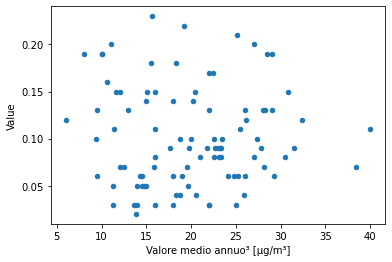

(-0.0200870754219599, 0.8467927641962918)
SpearmanrResult(correlation=0.03515144558671321, pvalue=0.7352254020474878)
KendalltauResult(correlation=0.03164225702582672, pvalue=0.6586729642142348)


In [39]:
#di cui tumori maligni della tiroide
desease="di cui tumori maligni della tiroide"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

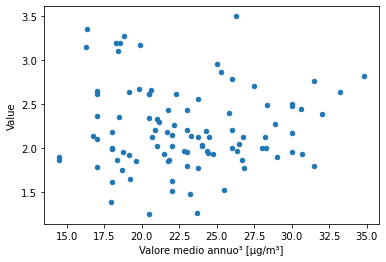

(0.00171902746295446, 0.9865268505196708)
SpearmanrResult(correlation=0.019618093719406798, pvalue=0.8471649063524294)
KendalltauResult(correlation=0.0027032652380055036, pvalue=0.9686345083036453)


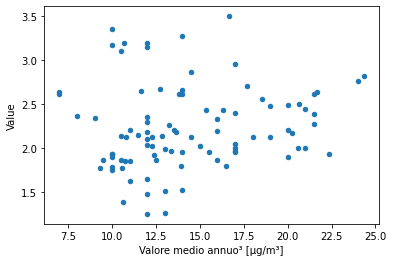

(0.142445580891768, 0.17317470546730823)
SpearmanrResult(correlation=0.21078589841500575, pvalue=0.04254999578048682)
KendalltauResult(correlation=0.14816399902166613, pvalue=0.03837626998170758)


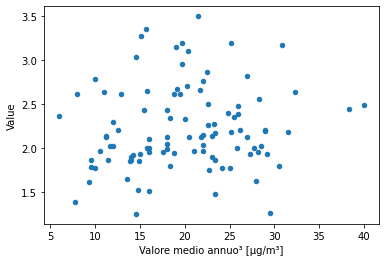

(0.11423728523757436, 0.2553257615252502)
SpearmanrResult(correlation=0.1409254826728187, pvalue=0.15981902388728078)
KendalltauResult(correlation=0.1004985764133332, pvalue=0.1390328010541462)


In [40]:
#di cui tumori maligni del seno
desease="di cui tumori maligni del seno"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

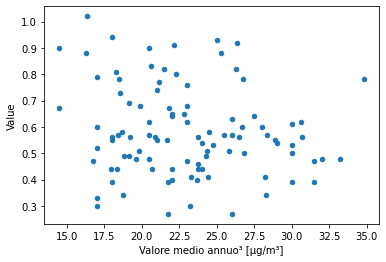

(-0.16035793806169515, 0.11283988994168499)
SpearmanrResult(correlation=-0.12927182984515015, pvalue=0.2022167446651324)
KendalltauResult(correlation=-0.09034940313393937, pvalue=0.1911426225270404)


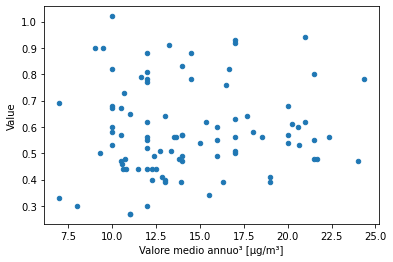

(0.06125821502577425, 0.559683760525049)
SpearmanrResult(correlation=0.04877803632897569, pvalue=0.6424235907489477)
KendalltauResult(correlation=0.03230073654122368, pvalue=0.6534781038577124)


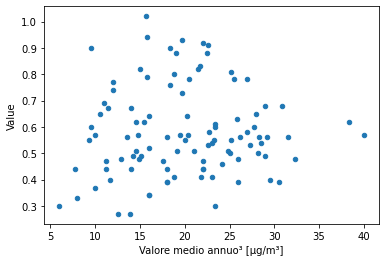

(0.05211964648883049, 0.6047177310946075)
SpearmanrResult(correlation=0.07103645705192929, pvalue=0.48024170922383513)
KendalltauResult(correlation=0.05354044625661982, pvalue=0.43301355920346885)


In [41]:
#di cui tumori maligni dell'ovaio
desease="di cui tumori maligni dell'ovaio"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)

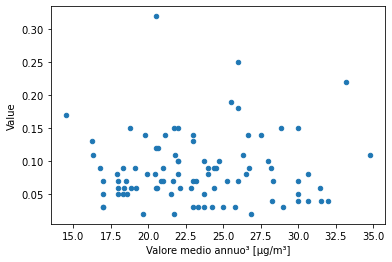

(0.02868378589260788, 0.7872380798439852)
SpearmanrResult(correlation=0.006830437841614126, pvalue=0.9487646175149487)
KendalltauResult(correlation=0.010160828959159155, pvalue=0.8904543703185365)


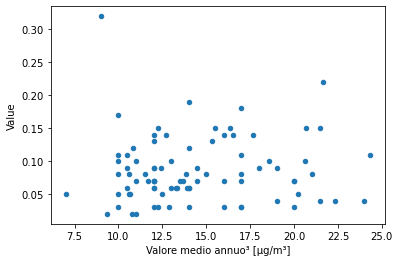

(0.048617085609419415, 0.6585961614846128)
SpearmanrResult(correlation=0.09720374021841348, pvalue=0.37615483407053496)
KendalltauResult(correlation=0.07653183821566664, pvalue=0.3209325198073094)


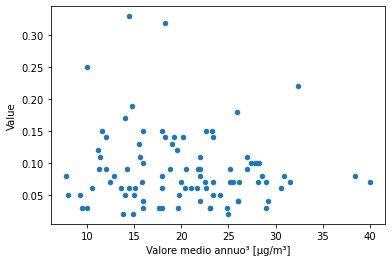

(-0.09070870414934945, 0.3871943286007373)
SpearmanrResult(correlation=-0.035342109600991864, pvalue=0.7366277072294066)
KendalltauResult(correlation=-0.028398189583315876, pvalue=0.6965864780562119)


In [42]:
#di cui asma
desease="di cui asma"
pollution_choose("PM10", desease)
pollution_choose("PM25", desease)
pollution_choose("NO2", desease)